In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [82]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
# omega = np.mean(omega)
omega = np.sort(omega)
m = 9
t = np.arange(0,5000,0.1)
K = 4.5
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

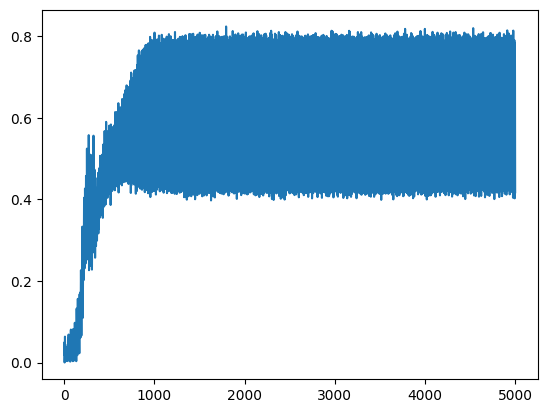

In [83]:
plt.plot(t,rs)

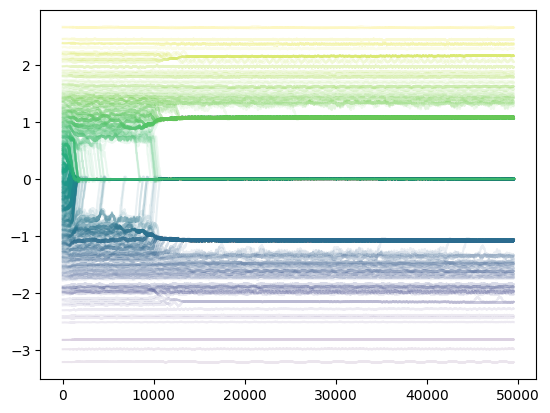

In [52]:
ln = plt.plot(avg_dtheta,alpha=0.1,color ='blue');
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
for i,l in enumerate(ln):
    l.set_color(color[i])

In [15]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    c_l,c_r = arg_psize[num],arg_psize[num]+1
    cluster = np.array([peaks_new[c_l]+1,peaks_new[c_r]-1])
    size = np.diff(np.array([peaks_new[c_l],peaks_new[c_r]-1]))
    return cluster,size



def near_main(peaks):
    num = 0
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    left_l,left_r = arg_psize[num]-1,arg_psize[num]
    l_cluster = np.array([peaks_new[left_l],peaks_new[left_r]-1])
    
    right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
    r_cluster = np.array([peaks_new[right_l],peaks_new[right_r]-1])
    return l_cluster,r_cluster


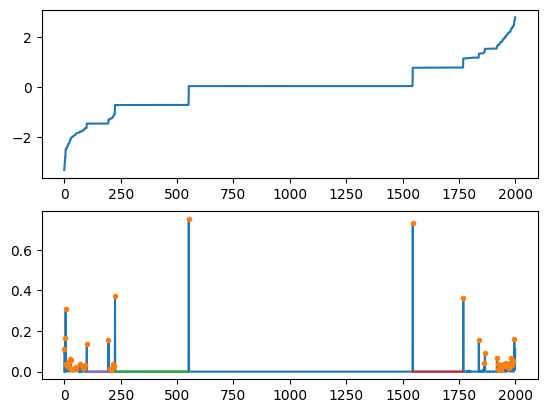

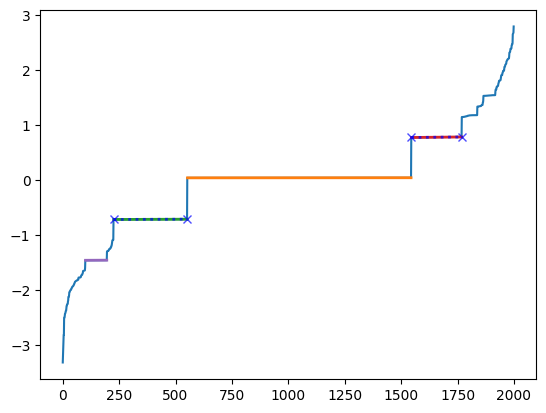

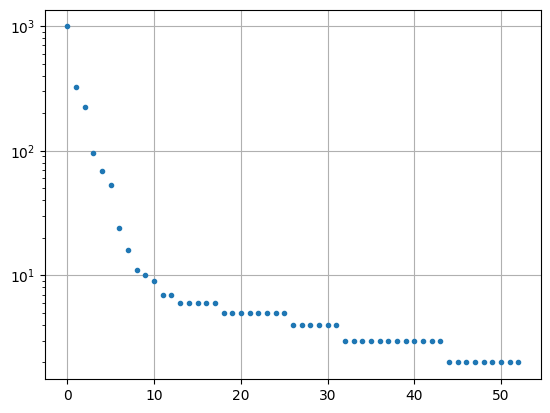

In [16]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,r_c = near_main(peaks)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
plt.plot(C_2,diff_dtheta[np.array(C_2)])
plt.plot(C_3,diff_dtheta[np.array(C_3)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index,arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')

plt.grid()

In [17]:
omega_p = lambda r,K=K,m=m : 4/np.pi*np.sqrt(K*r/m)
omega_d = lambda r,K=K : K*r

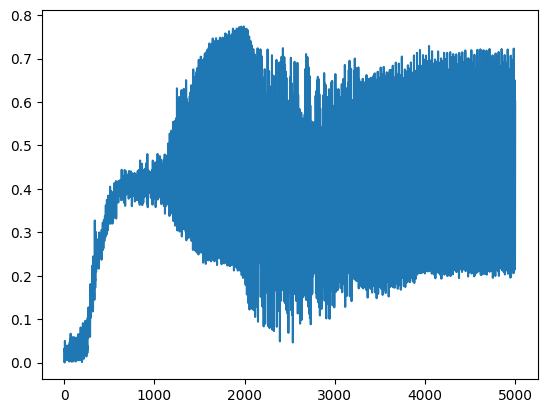

In [18]:
plt.plot(t,rs)

In [19]:
cluster_0 = arg[C_0[0]:C_0[1]]
cluster_1 = arg[C_1[0]:C_1[1]]
cluster_2 = arg[C_2[0]:C_2[1]]
cluster_3 = arg[C_3[0]:C_3[1]]
cluster_l = arg[l_c[0]:l_c[1]]
cluster_r = arg[r_c[0]:r_c[1]]

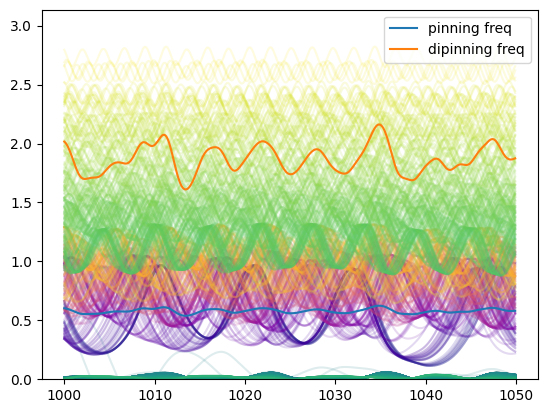

In [20]:
init =10000
interval = 500 

plt.plot(t[init:init+interval],omega_p(rs[init:init+interval]),label ='pinning freq',zorder=3)
plt.plot(t[init:init+interval],omega_d(rs[init:init+interval]),label ='dipinning freq',zorder=3)
ax = plt.gca()
ln = plt.plot(t[init:init+interval],dtheta[init:init+interval]-np.mean(avg_dtheta[i,cluster_0]),color = 'blue',alpha=0.15)
plt.legend(loc=1)
plt.ylim(0)

# ax2 = ax.twinx()
# ax2.plot(t[init:init+interval],rs[init:init+interval],color='tab:red',label ='order parameter')
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
color_main = plt.cm.bwr(NORM(omega[cluster_0]))
color_r = plt.cm.plasma(NORM(omega[cluster_r]))

for i,l in enumerate(ln):
    l.set_color(color[i])

j = 0
for i,l in enumerate(ln):
    if i in cluster_r:
        l.set_color(color_r[j])
        j+=1

In [135]:
len(rs)

50000

In [21]:
o_p = omega_p(rs)
o_d = omega_d(rs)

In [22]:
c_op= np.cumsum(o_p,axis=0)
sum_time = 500
avg_op = (c_op[sum_time:]-c_op[:-sum_time])/sum_time
std_op = [np.std(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)]
min_op = [np.min(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)]
max_op = [np.max(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)]
# data = np
mean_main = np.mean(avg_dtheta[:,cluster_0],axis=1)

In [23]:
c_od= np.cumsum(o_d,axis=0)
sum_time = 500
avg_od = (c_od[sum_time:]-c_od[:-sum_time])/sum_time
std_od = [np.std(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)]
min_od = [np.min(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)]
max_od = [np.max(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)]
# data = np
mean_main = np.mean(avg_dtheta[:,cluster_0],axis=1)

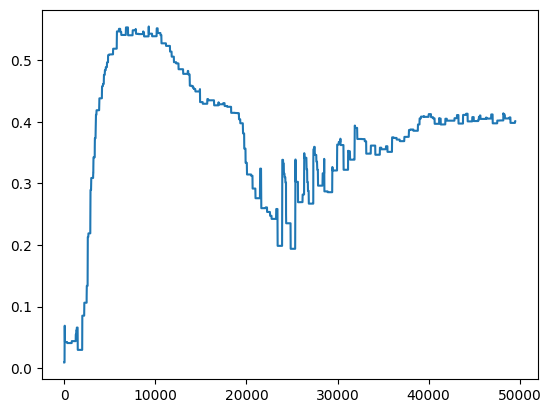

In [24]:
plt.plot(min_op)

In [25]:
drift_cluster = np.array(list(set(arg) - set(cluster_0)))

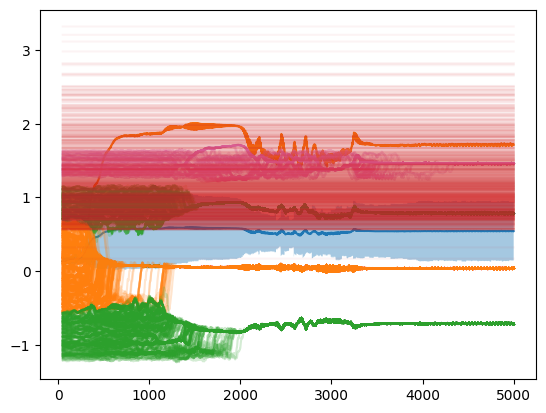

In [26]:
plt.plot(t[sum_time:],avg_op)
plt.plot(t[sum_time:],avg_od)
plt.fill_between(t[sum_time:],avg_op-min_op,avg_op+min_op,alpha=0.4)
# plt.fill_between(t[sum_time:],avg_od-min_od,avg_od+min_od,alpha=0.4)
# add = min_op
add = np.zeros_like(min_op)
# add = mean_main
# plt.plot(t[sum_time:],[omega[cluster_r]-add[i] for i in range(len(t[sum_time:])) ],alpha=0.1,color = 'tab:red')
# plt.plot(t[sum_time:],[omega[cluster_3]-mean_main[i] for i in range(len(t[sum_time:])) ],alpha=0.1,color = 'tab:red')
plt.plot(t[sum_time:],(avg_dtheta[:,cluster_0].T -add).T,alpha=0.2,color ='tab:orange')
plt.plot(t[sum_time:],(avg_dtheta[:,cluster_r].T -add).T,alpha=0.2,color = 'tab:green');
plt.plot(t[sum_time:],(avg_dtheta[:,cluster_l].T -add).T,alpha=0.2,color = 'tab:green');
plt.plot(t[sum_time:],(abs(avg_dtheta[:,cluster_3].T) -add).T,alpha=0.2,color = 'tab:pink');

plt.plot(t[sum_time:],[abs(omega[drift_cluster])-add[i] for i in range(len(t[sum_time:])) ],alpha=0.05,color = 'tab:red');

# plt.plot(t[sum_time:],(abs(avg_dtheta[:,drift_cluster].T) -add).T,alpha=0.1,color = 'tab:red');
# plt.plot(std_op)

# plt.xlim(0,2000)

In [550]:
np.where(omega>0)

(array([505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
        518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
        531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
        544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
        557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
        570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
        583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
        596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
        609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
        622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
        635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647,
        648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660,
        661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673,
        674, 675, 676, 677, 678, 679, 680, 681, 682

In [551]:
np.where((abs(omega)<o_p[i]),dtheta[i],np.nan)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [552]:
index = []
index_d = []
index_m = []
index_2 = []
c_main = 0
for i in range(len(rs)-500):
    index.append(np.where((o_d[sum_time+i]<dtheta[i])&(dtheta[i]<o_p[sum_time+i]))[0])
    index_d.append(np.where((o_p[sum_time+i]<abs(dtheta[i])))[0])
    c_second = np.where((o_p[sum_time+i]<abs(avg_dtheta[i]))&(abs(avg_dtheta[i]<o_d[sum_time+i])),avg_dtheta[i],np.nan)
    c_main = np.where((abs(avg_dtheta[i]-np.nanmean(c_main))<o_p[sum_time+i]),avg_dtheta[i],np.nan)

    index_m.append(c_main)
    index_2.append(c_second)


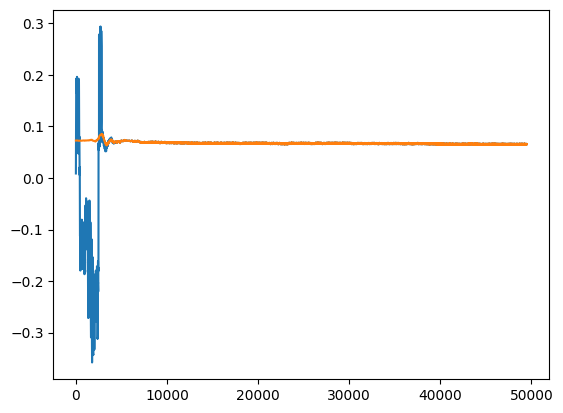

In [553]:
plt.plot(np.nanmean(index_m,axis=1))
plt.plot(mean_main)


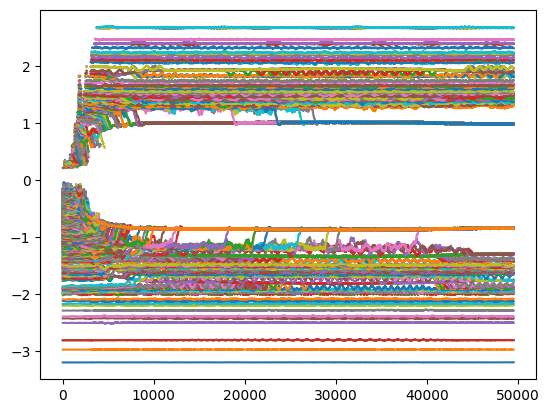

In [554]:
plt.plot(index_2)

In [555]:
np.nanmean(c_main)

0.0658044959701795

In [556]:
np.where(np.array([1.,3,4,5])>2,0,1)

array([1, 0, 0, 0])

In [557]:
pd.DataFrame(index_m)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
pd.DataFrame(index_m).plot(legend=False)

NameError: name 'index_m' is not defined

In [561]:
np.setdiff1d(cluster_0,np.where(~np.isnan(index_m[-1:])))

array([], dtype=int64)

In [209]:
min_ops = []
max_ops = []
mean_ops = []

min_ods = []
max_ods = []
mean_ods = []

btw_ops = []
main_ops = []
over_d_inps = []
in_ops = set()

main_dtheta=0
for i in range(len(rs)-sum_time):
    op_term = o_p[i:i+sum_time]
    od_term = o_d[i:i+sum_time]
    min_op = np.min(op_term)
    max_op = np.max(op_term)
    mean_op = np.mean(op_term)
    min_ops.append(min_op)
    max_ops.append(max_op)
    mean_ops.append(mean_op)


    min_od = np.min(od_term)
    max_od = np.max(od_term)
    mean_od = np.mean(od_term)
    min_ods.append(min_od)
    max_ods.append(max_od)
    mean_ods.append(mean_od)
    # in_dtheta = np.where((min_op<abs(avg_dtheta[i]-np.nanmean(main_dtheta)))&(abs(avg_dtheta[i]-np.nanmean(main_dtheta))<max_op),avg_dtheta[i],np.nan)
    first = (min_op<abs(omega-np.nanmean(main_dtheta)))&(abs(omega-np.nanmean(main_dtheta))<min_od)
    # main = (-min_op<(avg_dtheta[i]-np.nanmean(main_dtheta)))&((avg_dtheta[i]-np.nanmean(main_dtheta))<min_op)
    main = (-min_op<(omega-np.nanmean(main_dtheta)))&((omega-np.nanmean(main_dtheta))<min_op)
    main_max = (-max_op<(omega-np.nanmean(main_dtheta)))&((omega-np.nanmean(main_dtheta))<max_op)
    in_ops = in_ops|set(np.where(main_max)[0])
    over_d = (min_od<abs(omega-np.nanmean(main_dtheta))) 
    in_dtheta = np.where(first&~main,avg_dtheta[i],np.nan)
    onece_inop = np.isin(np.arange(N),np.array(list(in_ops)))
    over_d_inp = np.where(onece_inop,avg_dtheta[i],np.nan)
    main_dtheta = np.where(main,avg_dtheta[i],np.nan)
    btw_ops.append(in_dtheta)
    main_ops.append(main_dtheta)
    over_d_inps.append(over_d_inp)

In [147]:
indexs = []
for over_d_inp in over_d_inps[5000:]:
    idx = np.where(~np.isnan(over_d_inp))[0]
    for i in idx:
        indexs.append(i)

In [148]:
over_d_p_idx =np.array(list(set(indexs)))

In [150]:
len(over_d_p_idx)

0

In [151]:
set([1,34,5]) |set([1,2,3])

{1, 2, 3, 5, 34}

In [200]:
over_d_inps[-1]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [152]:
mean_main = np.nanmean(main_ops,axis=1)

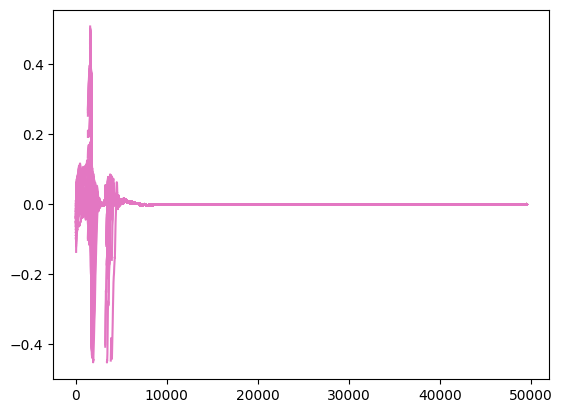

In [210]:
plt.plot((np.array(over_d_inps).T-mean_main ).T,color = 'tab:pink');


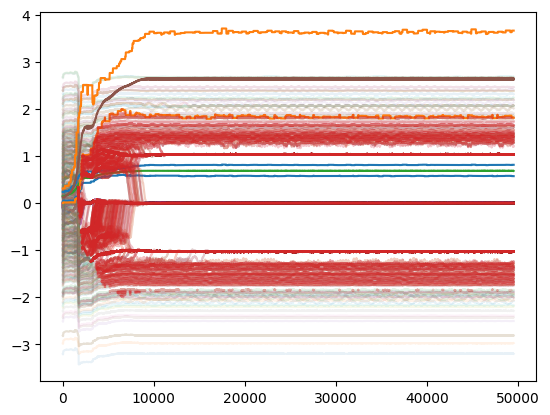

In [211]:
plt.plot(min_ops,color = 'tab:blue',zorder=3)
plt.plot(max_ops,color = 'tab:blue',zorder=3)
plt.plot(mean_ops,color = 'tab:green',zorder=3)

plt.plot(min_ods,color = 'tab:orange',zorder=3)
plt.plot(max_ods,color = 'tab:orange',zorder=3)
plt.plot(mean_ods,color = 'tab:brown',zorder=3)

plt.plot((np.array(btw_ops).T-mean_main).T,color = 'tab:red',zorder=3,alpha=0.2);
plt.plot((np.array(main_ops).T-mean_main ).T,color = 'tab:blue');
plt.plot((np.array(over_d_inps).T-mean_main ).T,color = 'tab:pink');
# plt.plot((avg_dtheta[:,over_d_p_idx].T-mean_main ).T,color = 'tab:pink',zorder=3);

plt.plot((avg_dtheta.T-mean_main ).T,alpha=0.1);
# plt.plot((avg_dtheta.T-mean_main ).T,alpha=0.1);
# plt.ylim(0)
# plt.plot(np.array(mean_ops));

In [183]:
plt.plot((avg_dtheta[:,over_d_p_idx].T-mean_main ).T,color = 'tab:blue',zorder=3);

IndexError: arrays used as indices must be of integer (or boolean) type

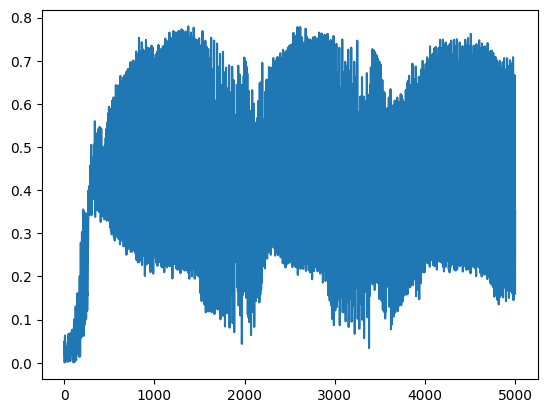

In [28]:
plt.plot(t,rs)

### cluster check 2

In [59]:
omega_p = lambda r,K=K,m=m : 4/np.pi*np.sqrt(K*r/m)
omega_d = lambda r,K=K : K*r
o_p = omega_p(rs)
o_d = omega_d(rs)

In [60]:
c_op= np.cumsum(o_p,axis=0)
sum_time = 500
avg_ops = (c_op[sum_time:]-c_op[:-sum_time])/sum_time
std_ops = np.array([np.std(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)])
min_ops = np.array([np.min(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)])
max_ops = np.array([np.max(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)])
# data = np
# mean_main = np.mean(avg_dtheta[:,cluster_0],axis=1)
c_od= np.cumsum(o_d,axis=0)
sum_time = 500
avg_ods = (c_od[sum_time:]-c_od[:-sum_time])/sum_time
std_ods = np.array([np.std(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)])
min_ods = np.array([np.min(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)])
max_ods = np.array([np.max(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)])
# data = np
# mean_main = np.mean(avg_dtheta[:,cluster_0],axis=1)

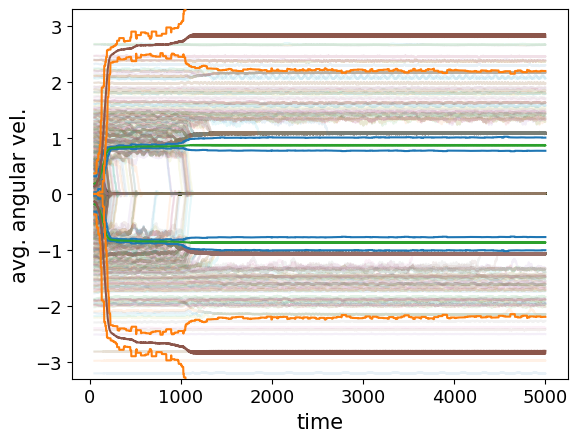

In [61]:
plt.plot(t[500:],min_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],max_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],avg_ops,color = 'tab:green',zorder=3)
plt.plot(t[500:],min_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],max_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],avg_ods,color = 'tab:brown',zorder=3)

plt.plot(t[500:],-min_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],-max_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],-avg_ops,color = 'tab:green',zorder=3)
plt.plot(t[500:],-min_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],-max_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],-avg_ods,color = 'tab:brown',zorder=3)

plt.ylim(-3.3,3.3)
plt.xlabel('time',fontsize=15)
plt.ylabel(r'avg. angular vel.',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.plot((np.array(btw_ops).T-mean_main).T,color = 'tab:red',zorder=3,alpha=0.2);
# plt.plot((np.array(main_ops).T-mean_main ).T,color = 'tab:blue');
# plt.plot((np.array(over_d_inps).T-mean_main ).T,color = 'tab:pink');
# # plt.plot((avg_dtheta[:,over_d_p_idx].T-mean_main ).T,color = 'tab:pink',zorder=3);

plt.plot(t[500:],(avg_dtheta),alpha=0.1);
# plt.plot((avg_dtheta.T-mean_main ).T,alpha=0.1);
# plt.ylim(0)
# plt.plot(np.array(mean_ops));

In [70]:
a_main = []
once_inop = np.array([],dtype=int)
main_dtheta=0
minus = np.nanmean(main_dtheta)
# minus = 0
for i in range(len(rs)-sum_time):
    omin_main = (abs(omega-minus)<min_ops[i])
    a_omin_main = (abs(avg_dtheta[i]-minus)<min_ops[i])
    omax_main = (abs(omega-minus)<max_ops[i])
    once_inop = np.union1d(np.where(omax_main)[0],once_inop)

    # over_d = (min_od[i]<abs(omega-np.nanmena(minus)))
    main_dtheta = np.where(a_omin_main,avg_dtheta[i],np.nan)
    # btw_ops.append(in_dtheta)
    # main_ops.append(main_dtheta)
    # over_d_inps.append(over_d_inp)
    minus = np.nanmean(main_dtheta)


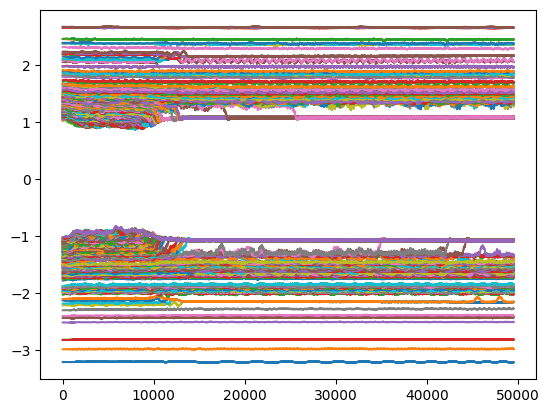

In [71]:

plt.plot(avg_dtheta[:,np.setdiff1d(np.arange(N),once_inop)]);

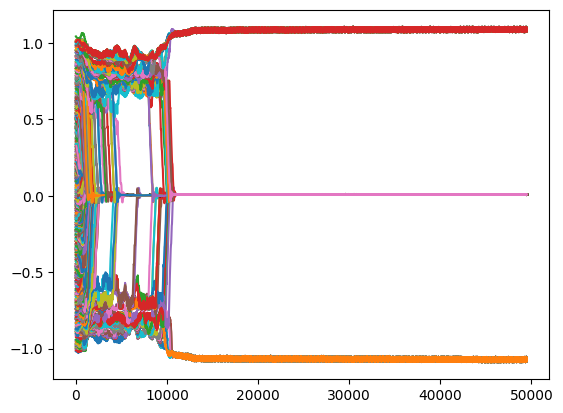

In [72]:
plt.plot(avg_dtheta[:,once_inop]);

## real time

In [86]:
omega_p = lambda r,K=K,m=m : 4/np.pi*np.sqrt(K*r/m)
omega_d = lambda r,K=K : K*r
o_p = omega_p(rs)
o_d = omega_d(rs)

In [96]:
a_main = []
once_inop = np.array([],dtype=int)
main_dtheta=0
minus = np.nanmean(main_dtheta)
rot_frames = []
main_frames = []
minuss = []
rot_frame = 0
# minus = 0
for i in range(len(rs)):
    or_main = (abs(omega-minus)<=o_p[i])&(abs(omega-minus)<o_d[i])
    in_d = (abs(omega-minus)<=o_d[i])
    a_omin_main = (abs(dtheta[i]-minus)<=o_p[i])
    once_inop = np.union1d(np.where(or_main)[0],once_inop)

    main_dtheta = np.where(a_omin_main,dtheta[i],np.nan)
    # rot_frame = np.where(np.isin(np.arange(N),once_inop),dtheta[i],np.nan)
    rot_frame = np.where(in_d,dtheta[i],np.nan)
    main_frame = np.where(a_omin_main,dtheta[i],np.nan)

    # minus = np.nanmean(main_frame)
    minus = 0
    
    rot_frames.append(rot_frame)
    main_frames.append(main_frame)
    minuss.append(minus)
minuss = np.array(minuss)
main_frames = np.array(main_frames)

Text(0, 0.5, 'main frame phase velocity')

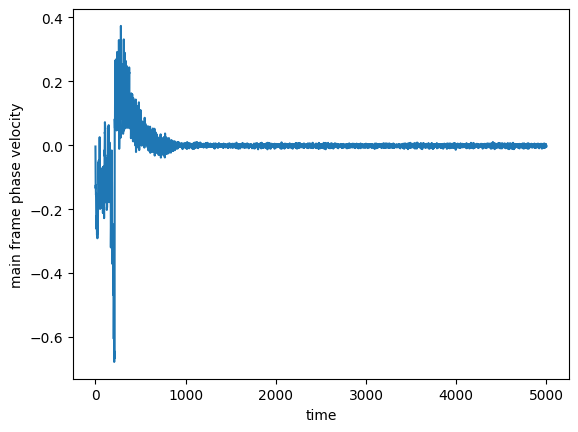

In [90]:
plt.plot(t,minuss)
plt.xlabel('time')
plt.ylabel('main frame phase velocity')

Text(0, 0.5, 'avg. angular vel.')

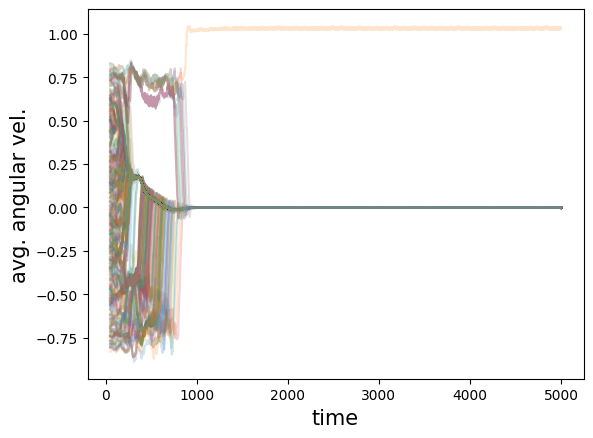

In [97]:
plt.plot(t[500:],(avg_dtheta[:,once_inop].T).T,alpha=0.2);
plt.xlabel('time',fontsize=15)
plt.ylabel(r'avg. angular vel.',fontsize=15)

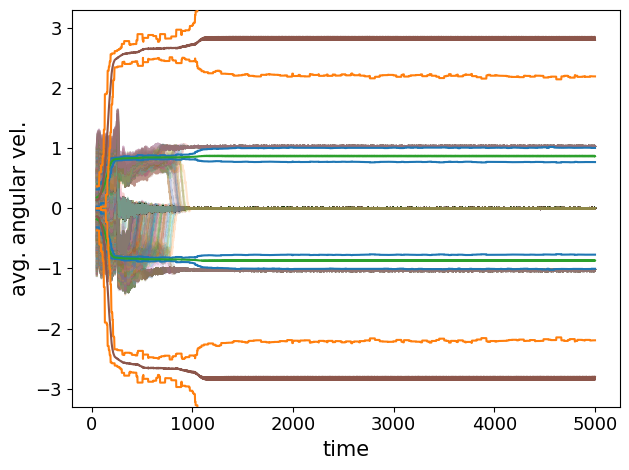

In [92]:
plt.plot(t[500:],min_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],max_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],avg_ops,color = 'tab:green',zorder=3)
plt.plot(t[500:],min_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],max_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],avg_ods,color = 'tab:brown',zorder=3)

plt.plot(t[500:],-min_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],-max_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],-avg_ops,color = 'tab:green',zorder=3)
plt.plot(t[500:],-min_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],-max_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],-avg_ods,color = 'tab:brown',zorder=3)

plt.ylim(-3.3,3.3)
plt.xlabel('time',fontsize=15)
plt.ylabel(r'avg. angular vel.',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(t[500:],(avg_dtheta[:,once_inop].T-minuss[:-500]).T,alpha=0.2);
plt.tight_layout()

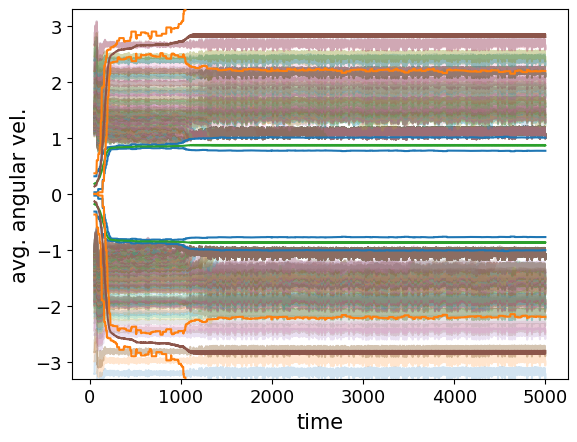

In [81]:
plt.plot(t[500:],min_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],max_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],avg_ops,color = 'tab:green',zorder=3)
plt.plot(t[500:],min_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],max_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],avg_ods,color = 'tab:brown',zorder=3)

plt.plot(t[500:],-min_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],-max_ops,color = 'tab:blue',zorder=3)
plt.plot(t[500:],-avg_ops,color = 'tab:green',zorder=3)
plt.plot(t[500:],-min_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],-max_ods,color = 'tab:orange',zorder=3)
plt.plot(t[500:],-avg_ods,color = 'tab:brown',zorder=3)

plt.ylim(-3.3,3.3)
plt.xlabel('time',fontsize=15)
plt.ylabel(r'avg. angular vel.',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(t[500:],(avg_dtheta[:,np.setdiff1d(np.arange(N),once_inop)].T-minuss[500:]).T,alpha=0.2);